# Credit Card Data Clustering

Here we have a sample of around 9000 creditcard holders for a span of 6 months depicting their purchase habits and the same can be used to segment the customers for marketting purpose to maximize sales as well customer satifaction.

This kernel focuses on **Gaussian Mixture Model** for clustering and will be devided in following sections:-
* [Introduction to Gaussian Mixture model](#1)
* [Importing Required Packages](#2)
* [Preprocessing](#3)
* [Data Visualization](#4)
* [Selection of k for GMM](#5)
* [Clustering using GMM](#6)
* [Interpretation of Clusters](#7)
* [Anomaly Detection](#8)

# <a id="1">Gaussian Mixture Model</a>

Gaussian Mixture Models (GMMs) are based on Gaussian Distributions and are flexible building blocks for other machine learning algorithms. They are great approximations for general probability distributions but also because they remain somewhat interpretable even when the dataset gets very complex. Mixture Models do not require to know about data and the subpopulation to which it belongs but learn about the same later on by finding the distribution(s) for its each feature.

In our dataset we have 17 features, _viz_ , 
 - **CUSTID** : Identification of Credit Card holder (Categorical)
 - **BALANCE** : Balance amount left in their account to make purchases
 - **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
 - **PURCHASES** : Amount of purchases made from account
 - **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
 - **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
 - **CASHADVANCE** : Cash in advance given by the user
 - **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 - **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
 - **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
 - **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
 - **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
 - **PURCHASESTRX** : Numbe of purchase transactions made
 - **CREDITLIMIT** : Limit of Credit Card for user
 - **PAYMENTS** : Amount of Payment done by user
 - **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
 - **PRCFULLPAYMENT** : Percent of full payment paid by user
 - **TENURE** : Tenure of credit card service for user

Leaving the first feature each may have its own Gaussian distribution that can easily depict the customer behaviour. Now we start with importing the required packages.

# <a id = "2">Importing Required Packages</a>
We have imported various packages here for purpose as below:-
 - **Numpy** : *for array manipulation*
 - **Pandas** : *for reading dataset and manipulating its data*
 - **matplotlib and Seaborn** : *for Data Visualization*
 - **sklearn packages** : *for clustering*
 - **IPython classes** : *for formatting output in kernel*

In [1]:
#STEP 1: Get right arrows in quiver

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import warnings #To hide warnings

#1.1: Set the stage
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML

InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")

## Reading and Pre-viewing Data

In [2]:
cc = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
cc.info()
cc[cc.columns[cc.isna().any()]].isna().sum().to_frame().T
cc.sample(5)
cc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1,313


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1349,C11395,2153.498372,1.0,5428.77,3064.59,2364.18,2399.569867,1.000000,0.500000,1.0,0.166667,3,45,12500.0,4059.375700,496.075078,0.083333,12
6865,C17053,988.405365,1.0,637.97,45.65,592.32,38.322217,1.000000,0.083333,1.0,0.083333,1,25,1000.0,864.471651,903.567225,0.000000,12
8804,C19044,1704.571464,0.8,0.00,0.00,0.00,4826.892774,0.000000,0.000000,0.0,0.300000,12,0,5000.0,573.683142,480.409005,0.000000,10
47,C10049,3910.111237,1.0,0.00,0.00,0.00,1980.873201,0.000000,0.000000,0.0,0.500000,7,0,4200.0,0.000000,NaN,0.000000,12
7116,C17309,1664.334555,1.0,862.95,862.95,0.00,0.000000,0.333333,0.333333,0.0,0.000000,0,5,1900.0,987.668179,892.915026,0.000000,12


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
cc.quantile([0.75,0.8,.85,.9,.95,1])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0.75,2054.140036,1.0,1110.1300,577.4050,468.6375,1113.821139,0.916667,0.300000,0.750000,0.222222,4.0,17.0,6500.0,1901.134317,825.485459,0.142857,12.0
0.80,2571.434263,1.0,1422.4380,816.9920,603.2920,1574.933778,1.000000,0.416667,0.857143,0.250000,5.0,22.0,7000.0,2314.017654,1026.297507,0.250000,12.0
0.85,3183.333173,1.0,1859.1160,1116.4075,823.0615,2194.722013,1.000000,0.529546,0.916667,0.333333,7.0,27.0,8000.0,2945.839128,1313.933300,0.424405,12.0
0.90,4338.563657,1.0,2542.6240,1600.0990,1140.0700,3065.534560,1.000000,0.750000,1.000000,0.416667,10.0,37.0,9500.0,3923.906642,1780.651744,0.670000,12.0
0.95,5909.111808,1.0,3998.6195,2671.0940,1750.0875,4647.169122,1.000000,1.000000,1.000000,0.583333,15.0,57.0,12000.0,6082.090595,2766.563310,1.000000,12.0
1.00,19043.138560,1.0,49039.5700,40761.2500,22500.0000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.0,358.0,30000.0,50721.483360,76406.207520,1.000000,12.0


### OBSERVATIONS
- Balance is updated frequently(**25% percentile is 1**) in most cases.
- Most of the customers have CC tenure 12 (**1<sup>st</sup> quantile is 12**).
- most of the customers avoid cash advance, but a section (below 5% of them all,above 75% use no cash advances) uses cash advances and these advances are paid even 50% faster than regular advances[**CASHADVANCEFREQUENCY max value is 1.5 instead of general frequency max 1.0**]
- Only 5% of customers make most of purachases.

In [4]:
display(HTML('<h4>There are '+str(np.sum(cc.BALANCE>cc.CREDIT_LIMIT))
             +' customers in the list who have more balance than the credit limit assigned. '
             +'It may be due to more payament than usage and/or continuous pre-payment.</h4>'))

# <a id="3">Pre Pocessing</a>
The dataset has 8 features and 8950 observations. The dataset has **NaN** values in 2 features, viz, **CREDIT_LIMIT and	MINIMUM_PAYMENTS**. To remove these NaN values we can either remove these rows/columns or can **impute the features with mean/median/minimum or maximum** (since data being numerical, forefill or backfill not considered).Again, as the columns are of importance thus min/max imputation is out of question. Now to find out correct imputation we check their distribution.

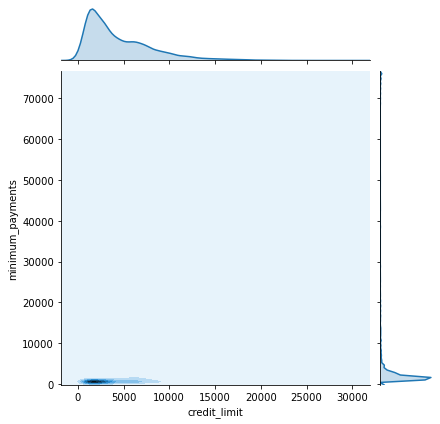

In [5]:
cc.rename(columns = {col:col.lower() for col in cc.columns.values},inplace=True)
sns.jointplot(cc.credit_limit,cc.minimum_payments,kind = 'kde', dropna=True)

As both the plots are skewed (to right), mean imputation can affect the model thus we go with **median imputation**. To do so we can either use sklearn **SimpleImputer** class or can simply use **fillna method from pandas to replace all NaN values with median of the feature** as shown below.

After that,the cust_id feature does not affect our model(being unique) we can drop the same.
Futhermore, The dataset has to be **Scaled and normalized** to avoid effect of size of value-set premise. 

In [6]:
cc.fillna(cc.median(),inplace=True) #More outliers thus median in both cases
cust = cc.cust_id
cc.drop(columns = ['cust_id'],inplace=True)

In [7]:
ss = StandardScaler()
X= normalize(ss.fit_transform(cc.copy()))
X = pd.DataFrame(X,columns=cc.columns.values)

# <a id="4">Data Visualization and Interpretation</a>
After scaling and normalization, we can verify the distribution of the features and their mutual- dependence. *First*, we draw a box chart to see the percentiles as below.

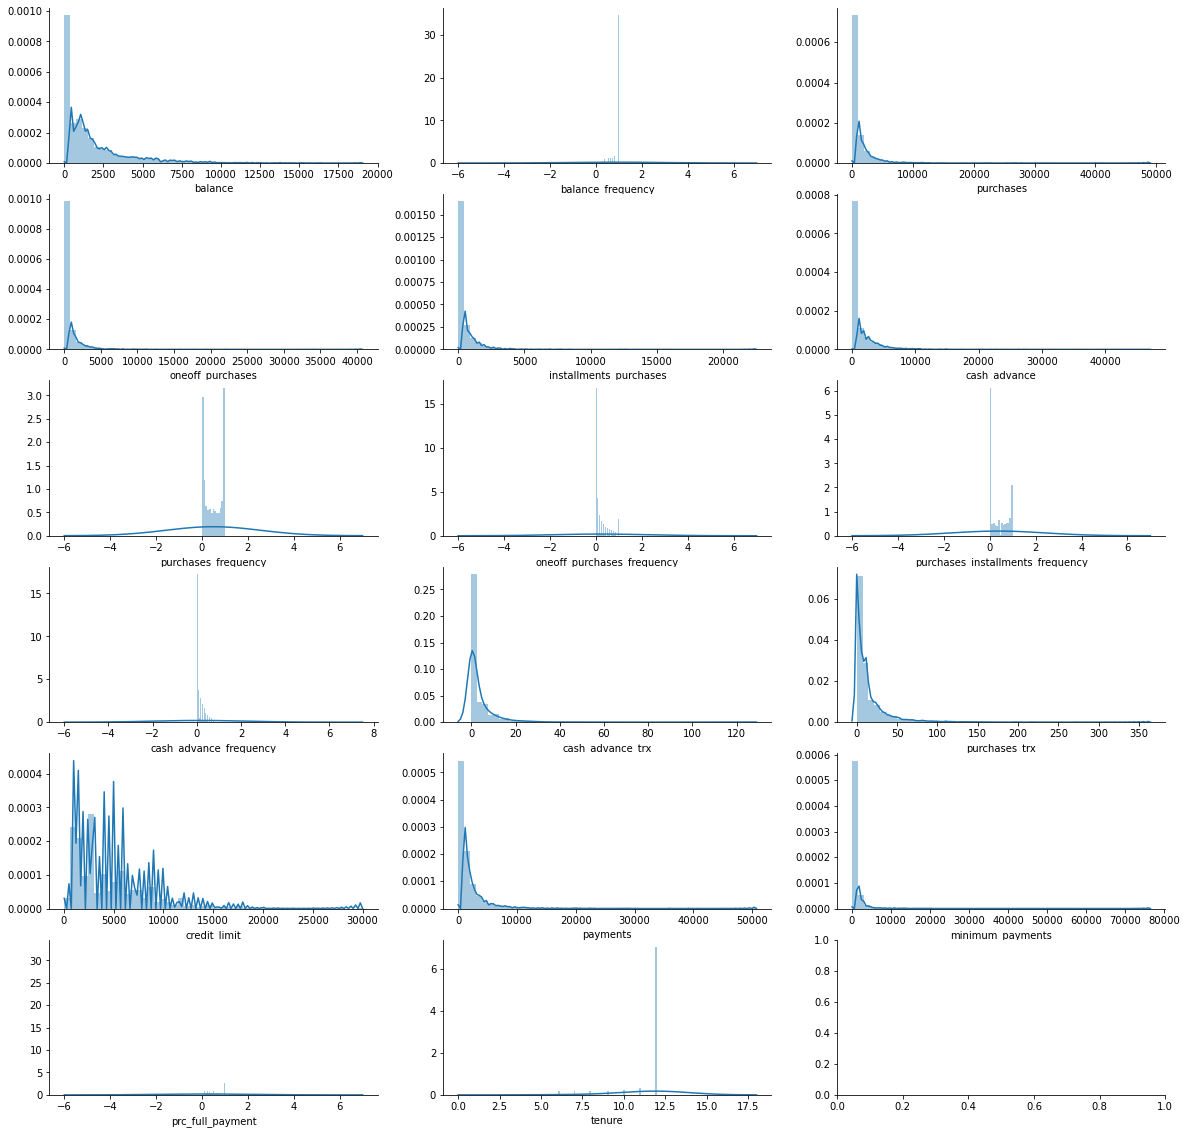

In [8]:
fig, axs = plt.subplots(6,3, figsize=(20, 20))
for i in range(17):
        p = sns.distplot(cc[cc.columns[i]], ax=axs[i//3,i%3],kde_kws = {'bw':2})
        p = sns.despine()
plt.show()

### OBSERVATIONS

- In some cases **Balance** is unutilised.
- There are **two** clear segments for purchases, one avoiding purchases at all and another purchasing much frequenly(just 5% making almost all)
- Most of the cutomers avail credit limit below 10k
- Payments are highly skewed and most payments are below 10k

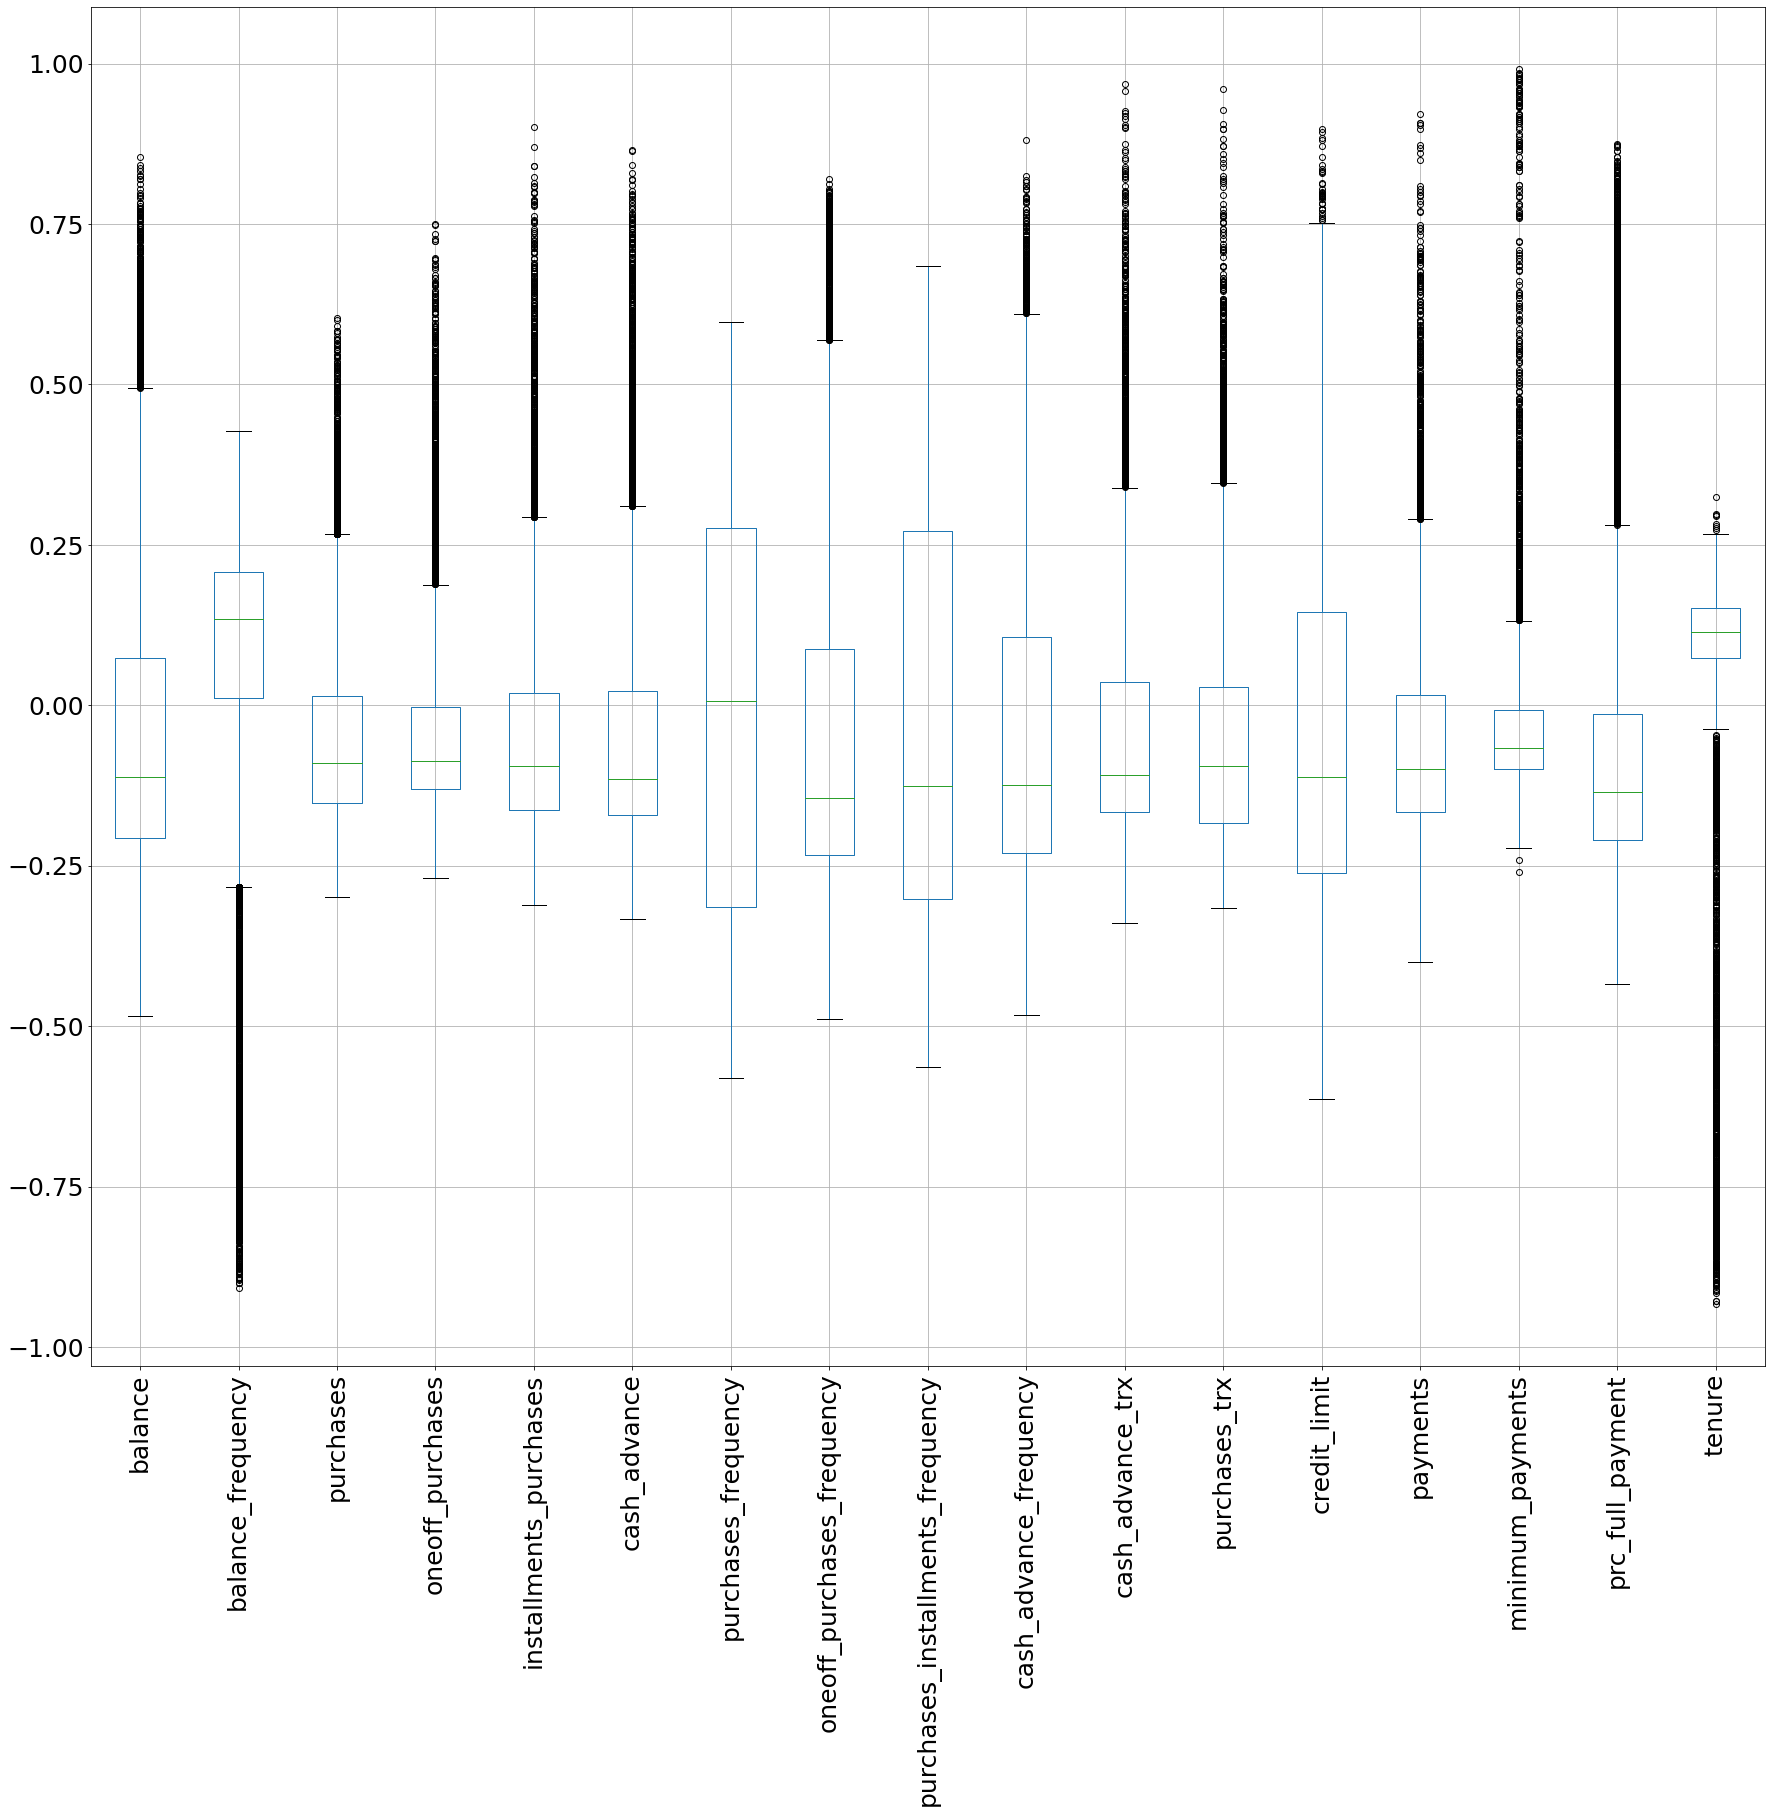

In [9]:
X.boxplot(figsize = (30,25),grid=True,fontsize=25,rot=90)

As the chart shows, there is a number of outliers in almost all the features. While Balance frequency and tenure have outliers down almost all other features have outliers up the whisker. We can assume that there we will find quiet a many anomalous observations, that opens a scope of finding frauds also.
<br>
Now we can check the correlations of features.

<Figure size 1152x864 with 0 Axes>

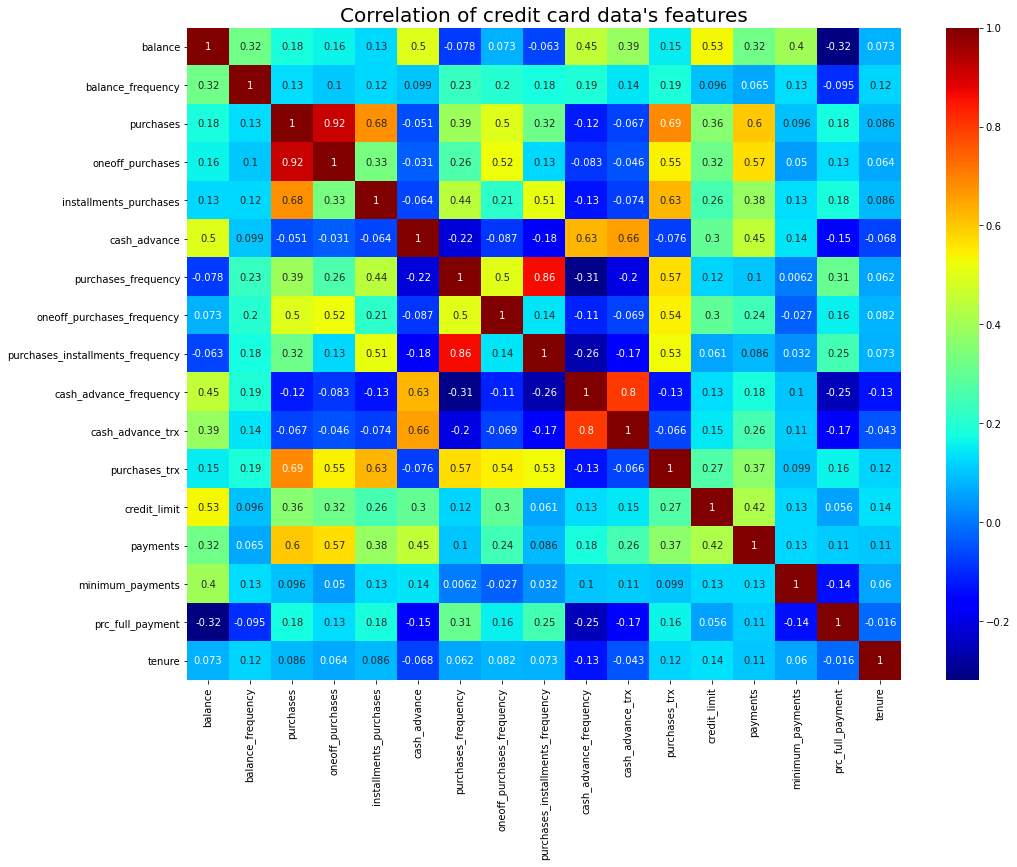

In [10]:
plt.figure(figsize=(16,12))
p = sns.heatmap(cc.corr(),annot=True,cmap='jet').set_title("Correlation of credit card data\'s features",fontsize=20)
plt.show()

The heatmap shows the features are corellated. Here we can either drop the columns by capping variance or can use all of them for clustering. We gao with the second option.

# <a id ="5">Selection of k for Gaussian Mixture Model</a>
We can evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).
Here, we are checking for both AIC as well BIC for estimating value of k

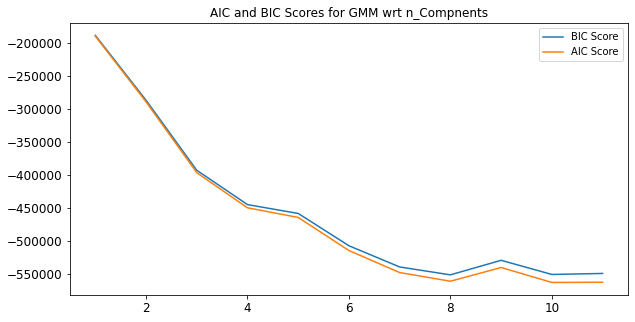

In [11]:
#Selecting correct number of components for GMM
models = [GMM(n,random_state=0).fit(X) for n in range(1,12)]
d = pd.DataFrame({'BIC Score':[m.bic(X) for m in models],
                  'AIC Score': [m.aic(X) for m in models]},index=np.arange(1,12))
d.plot(use_index=True,title='AIC and BIC Scores for GMM wrt n_Compnents',figsize = (10,5),fontsize=12)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f066a15b150>,
                 k=None, model=None)

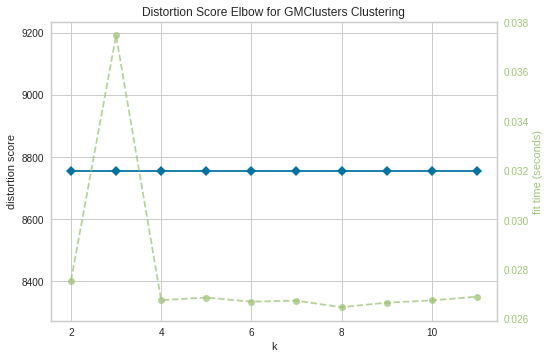

In [12]:
from sklearn.base import ClusterMixin
from yellowbrick.cluster import KElbow

class GMClusters(GMM, ClusterMixin):

    def __init__(self, n_clusters=1, **kwargs):
        kwargs["n_components"] = n_clusters
        kwargs['covariance_type'] = 'full'
        super(GMClusters, self).__init__(**kwargs)

    def fit(self, X):
        super(GMClusters, self).fit(X)
        self.labels_ = self.predict(X)
        return self 

oz = KElbow(GMClusters(), k=(2,12), force_model=True)
oz.fit(X)
oz.show()

Here we have limited the models to "full- covariance".<br>
The chart here shows that the value of AIC as well BIC are continuously decreasing. That may be due to so much noise or small size of sample. For covenience, we take model[6] as our model.

In [13]:
model= models[6]
model.n_init = 10
model

GaussianMixture(n_components=7, n_init=10, random_state=0)

# <a id="6">Clustering using GMM (k = 7)</a>
Now we actually cluster the data with k =7. For better results we can change n_init to 10.

In [14]:
clusters = model.fit_predict(X)
display(HTML('<b>The model has converged :</b>'+str(model.converged_)))
display(HTML('<b>The model has taken iterations :</b>'+str(model.n_iter_)))

# <a id="7">Interpretation of Clusters</a>

Text(0.5, 1.0, 'Cluster sizes')

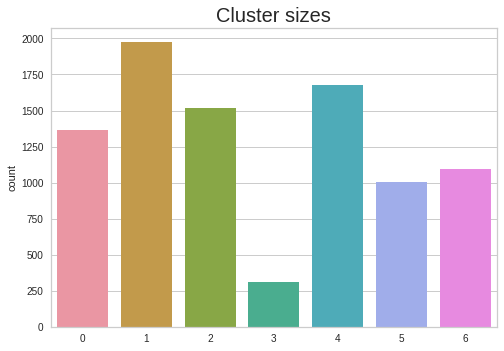

In [15]:
sns.countplot(clusters).set_title('Cluster sizes',fontsize=20)

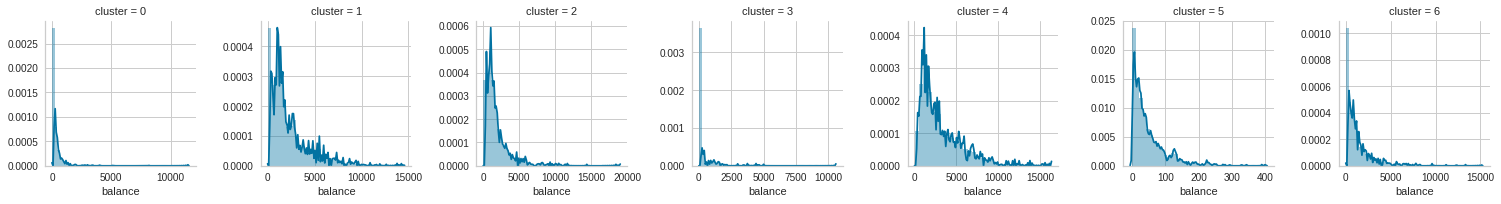

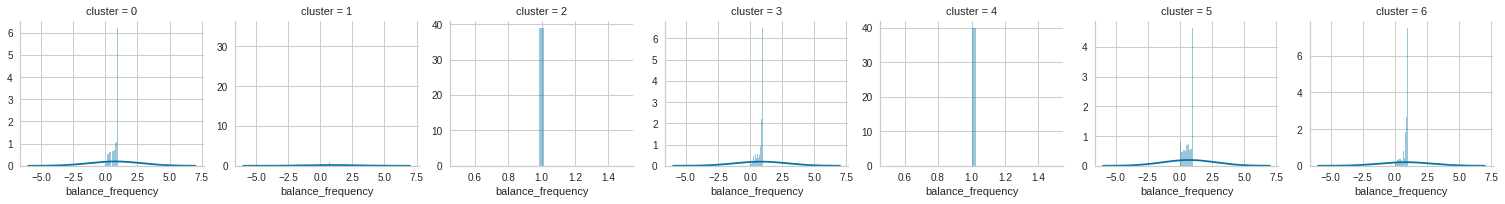

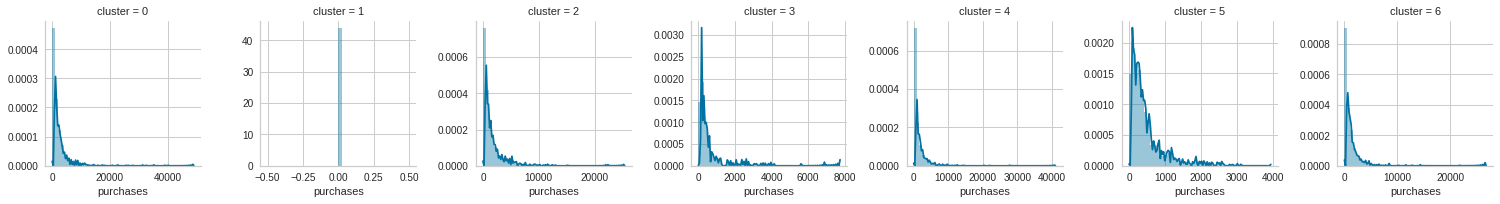

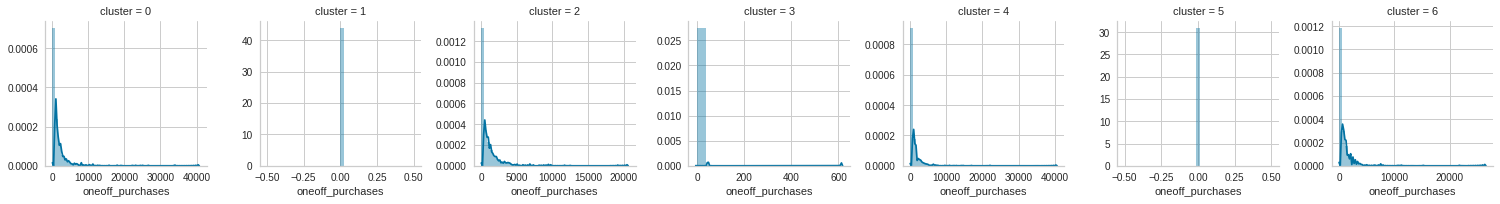

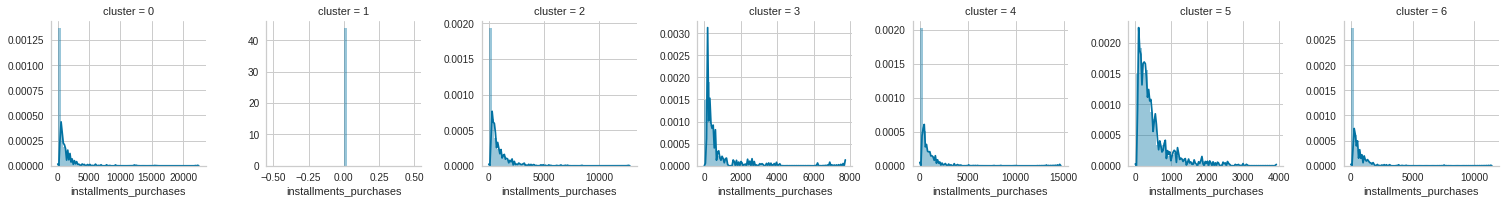

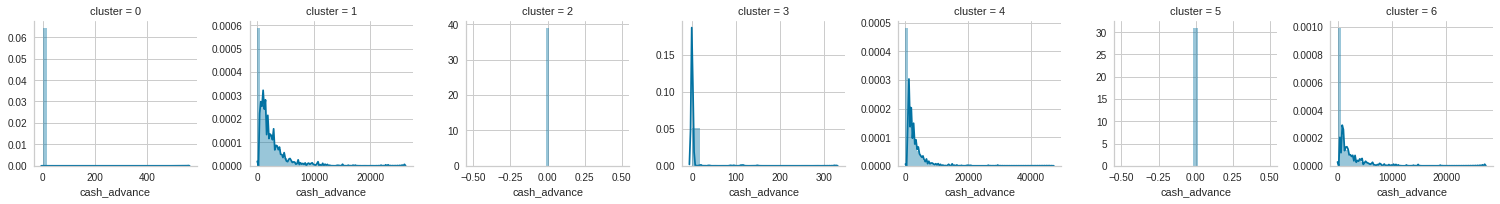

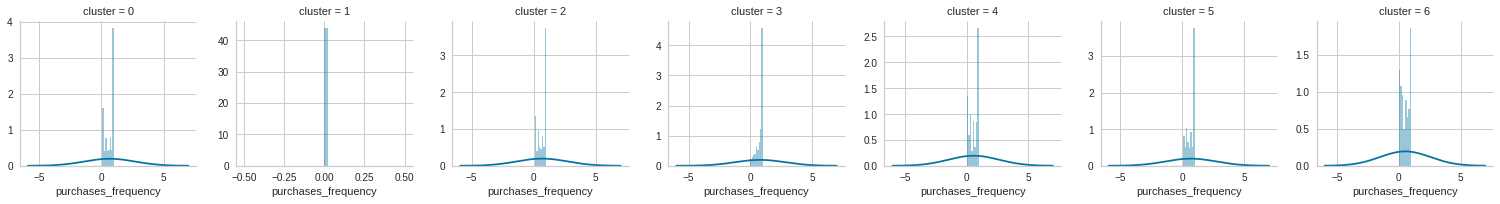

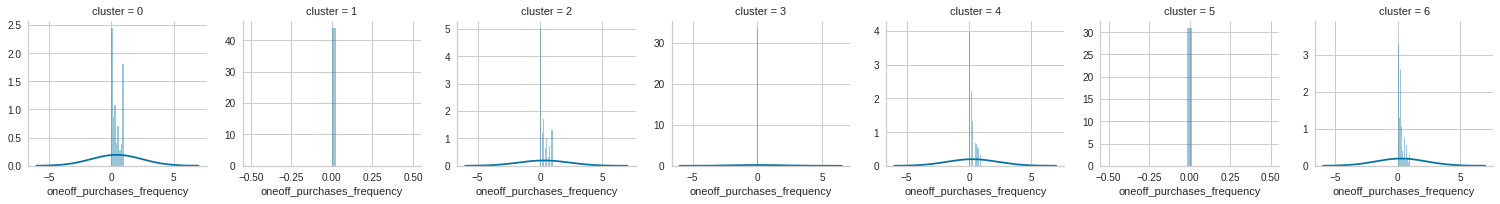

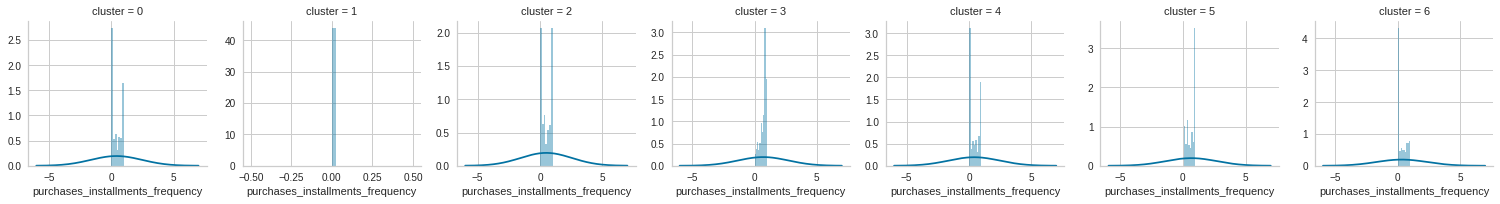

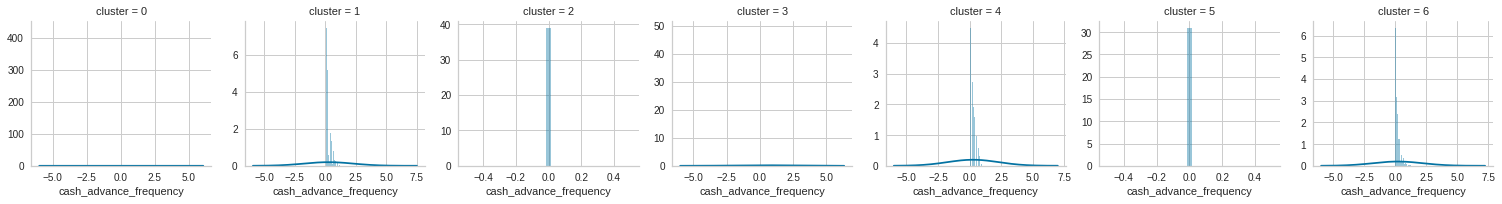

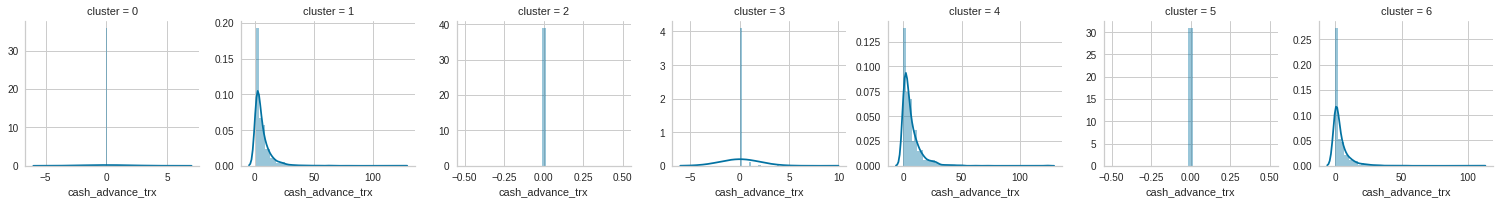

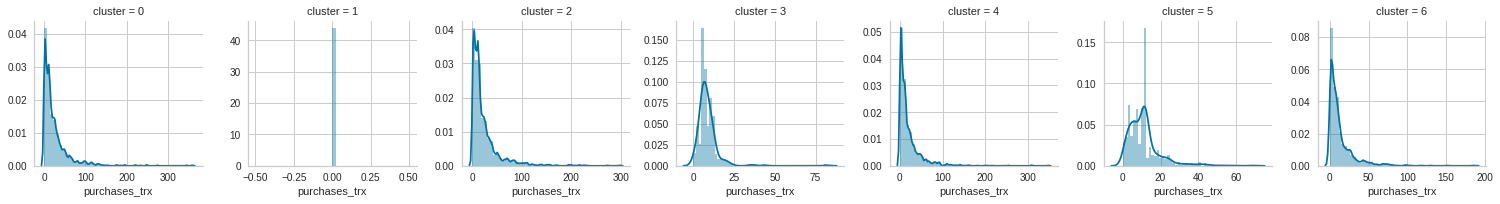

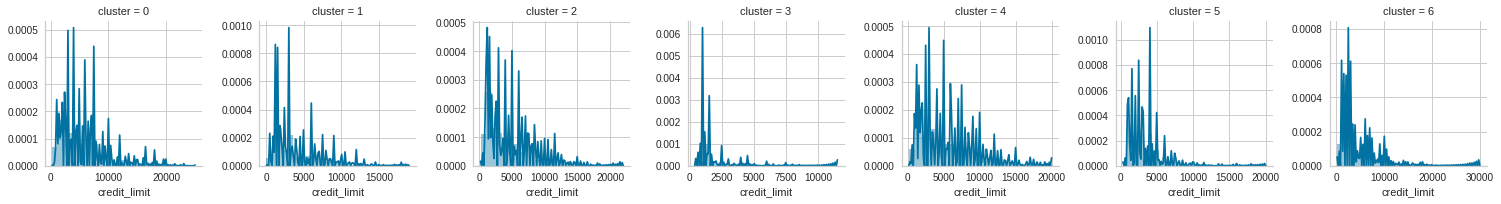

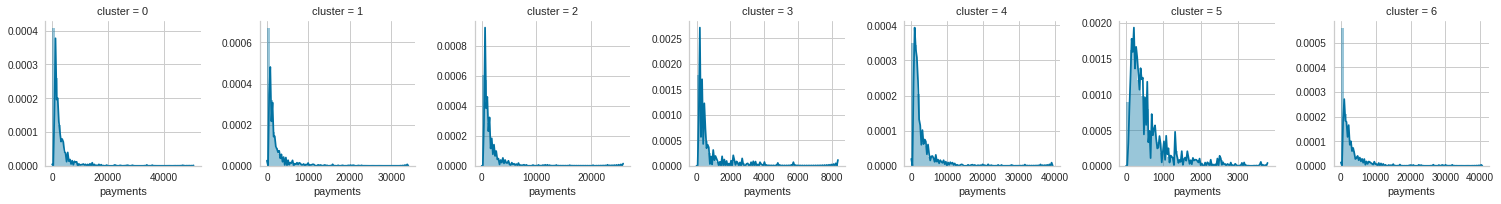

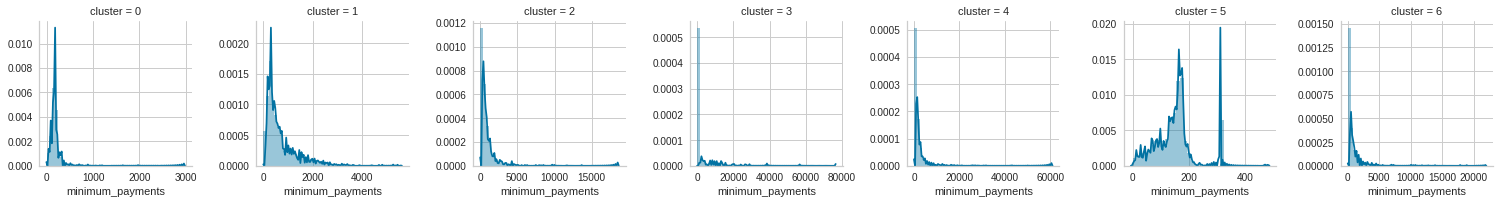

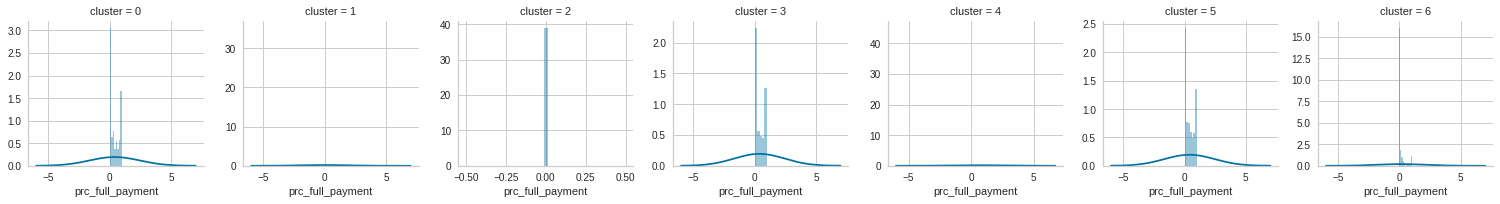

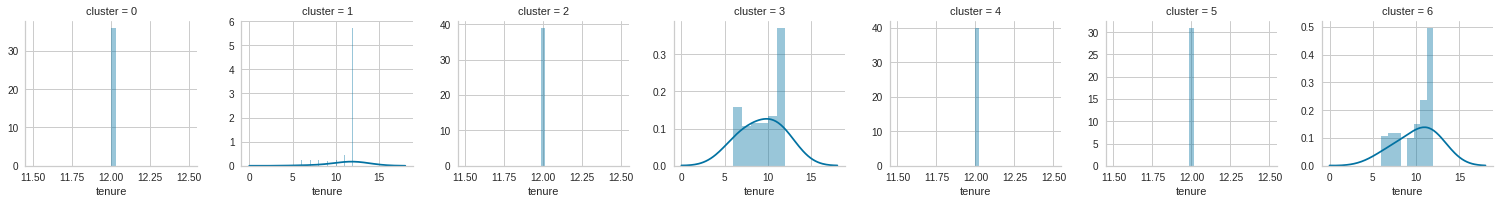

In [16]:
cc1 = cc.copy()
cc1['cluster']=clusters
for c in cc1:
    if c != 'cluster':
        grid= sns.FacetGrid(cc1, col='cluster',sharex=False,sharey=False)
        p = grid.map(sns.distplot, c,kde_kws = {'bw':2})
plt.show()

In [17]:
#cc1.groupby('cluster').agg({np.min,np.max,np.mean}).T
for i in range(7):
    display(HTML('<h2>Cluster'+str(i)+'</h2>'))
    cc1[cc1.cluster == i].describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.0,1367.0
mean,292.437680,0.779876,2081.845713,1384.526284,697.319429,0.408315,0.658986,0.432516,0.420751,0.000061,0.000732,25.163131,5530.685642,2186.626817,185.943226,0.401061,12.0,0.0
std,581.747641,0.280053,3621.378207,2842.180713,1438.529479,15.096623,0.350509,0.359305,0.400375,0.002254,0.027047,33.399711,4055.159547,3515.196898,156.480930,0.380901,0.0,0.0
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.055880,0.000000,12.0,0.0
25%,48.185721,0.545455,436.975000,168.975000,0.000000,0.000000,0.333333,0.083333,0.000000,0.000000,0.000000,6.000000,2500.000000,556.830849,131.631859,0.000000,12.0,0.0
50%,140.741786,0.909091,1070.730000,620.000000,242.060000,0.000000,0.750000,0.333333,0.333333,0.000000,0.000000,14.000000,4500.000000,1275.398838,171.595701,0.272727,12.0,0.0
75%,332.335637,1.000000,2406.370000,1485.480000,810.325000,0.000000,1.000000,0.833333,0.833333,0.000000,0.000000,31.000000,7500.000000,2537.618461,199.282402,0.777778,12.0,0.0
max,11547.520010,1.000000,49039.570000,40761.250000,22500.000000,558.166886,1.000000,1.000000,1.000000,0.083333,1.000000,358.000000,25000.000000,50721.483360,2974.069421,1.000000,12.0,0.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1975.000000,1975.000000,1975.0,1975.0,1975.0,1975.000000,1975.0,1975.0,1975.0,1975.000000,1975.000000,1975.0,1975.00000,1975.000000,1975.000000,1975.000000,1975.000000,1975.0
mean,2127.956821,0.878865,0.0,0.0,0.0,2015.691838,0.0,0.0,0.0,0.274596,6.311392,0.0,4048.21097,1665.468320,694.258841,0.045286,11.303797,1.0
std,2111.322864,0.235308,0.0,0.0,0.0,2495.065255,0.0,0.0,0.0,0.202225,8.147684,0.0,3281.37788,2747.025463,678.747500,0.139954,1.567095,0.0
min,0.000000,0.000000,0.0,0.0,0.0,18.042768,0.0,0.0,0.0,0.083333,1.000000,0.0,50.00000,0.000000,0.117036,0.000000,6.000000,1.0
25%,712.558483,0.888889,0.0,0.0,0.0,390.039704,0.0,0.0,0.0,0.100000,2.000000,0.0,1500.00000,364.954480,267.564809,0.000000,12.000000,1.0
50%,1440.568286,1.000000,0.0,0.0,0.0,1240.838098,0.0,0.0,0.0,0.250000,4.000000,0.0,3000.00000,766.465991,451.686224,0.000000,12.000000,1.0
75%,2809.032538,1.000000,0.0,0.0,0.0,2718.984206,0.0,0.0,0.0,0.333333,8.000000,0.0,6000.00000,1727.271498,905.557915,0.000000,12.000000,1.0
max,14581.459140,1.000000,0.0,0.0,0.0,26194.049540,0.0,0.0,0.0,1.500000,123.000000,0.0,19000.00000,34107.074990,5601.587776,1.000000,12.000000,1.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1521.000000,1521.0,1521.000000,1521.000000,1521.000000,1521.0,1521.000000,1521.000000,1521.000000,1521.0,1521.0,1521.000000,1521.000000,1521.000000,1521.000000,1521.0,1521.0,1521.0
mean,1765.543339,1.0,1436.828199,852.690480,584.284675,0.0,0.667927,0.313609,0.494302,0.0,0.0,23.293886,4593.885602,1329.001831,808.181187,0.0,12.0,2.0
std,1875.868504,0.0,2067.700703,1534.491128,994.825721,0.0,0.335483,0.326917,0.399909,0.0,0.0,30.741041,3616.798630,1836.990156,1170.733207,0.0,0.0,0.0
min,2.641101,1.0,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.0,0.0,0.000000,200.000000,0.000000,11.802831,0.0,12.0,2.0
25%,673.982097,1.0,303.030000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.0,0.0,6.000000,1500.000000,428.640942,241.954677,0.0,12.0,2.0
50%,1216.570617,1.0,749.300000,326.740000,264.800000,0.0,0.750000,0.166667,0.500000,0.0,0.0,12.000000,3500.000000,766.573245,451.651522,0.0,12.0,2.0
75%,2085.013555,1.0,1707.260000,1037.800000,724.830000,0.0,1.000000,0.500000,0.916667,0.0,0.0,28.000000,6500.000000,1500.221266,906.697643,0.0,12.0,2.0
max,19043.138560,1.0,25378.360000,20646.070000,12738.470000,0.0,1.000000,1.000000,1.000000,0.0,0.0,298.000000,22000.000000,25825.324820,18621.013310,0.0,12.0,2.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0
mean,315.749895,0.829253,603.513910,2.253045,608.320865,3.447387,0.778686,0.002137,0.692193,0.003472,0.044872,8.605769,1912.660256,597.274647,2214.712522,0.390650,9.282051,3.0
std,882.774509,0.245797,950.175449,34.803065,960.741710,24.190800,0.266657,0.029051,0.256733,0.023370,0.296669,6.538658,1562.855096,922.961517,7177.424983,0.399342,2.125620,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000,2.167809,0.000000,6.000000,3.0
25%,18.180202,0.727273,163.377500,0.000000,163.122500,0.000000,0.600000,0.000000,0.500000,0.000000,0.000000,6.000000,1000.000000,143.933524,86.792489,0.000000,7.000000,3.0
50%,51.586258,0.954546,290.810000,0.000000,293.050000,0.000000,0.888889,0.000000,0.800000,0.000000,0.000000,7.000000,1500.000000,298.770449,127.912012,0.250000,10.000000,3.0
75%,175.303542,1.000000,575.757500,0.000000,582.147500,0.000000,1.000000,0.000000,0.875000,0.000000,0.000000,10.000000,2000.000000,550.761583,205.417183,0.800000,11.000000,3.0
max,10571.411070,1.000000,7739.480000,611.650000,7739.480000,325.076569,1.000000,0.500000,1.000000,0.333333,4.000000,82.000000,11500.000000,8337.882098,76406.207520,1.000000,12.000000,3.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.0
mean,3127.358051,1.0,1246.686112,759.884931,486.886983,1982.874992,0.577519,0.271218,0.420046,0.275691,7.003578,20.132976,5424.925462,2457.195511,1849.852665,0.020419,12.0,4.0
std,2576.909012,0.0,2151.420716,1741.063629,928.037306,2842.362899,0.360521,0.291548,0.400322,0.209054,8.702590,28.771291,3910.730687,3450.078936,3753.163118,0.053763,0.0,0.0
min,24.976709,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,3.197940,0.000000,12.0,4.0
25%,1237.897608,1.0,217.500000,32.000000,0.000000,323.218285,0.250000,0.083333,0.000000,0.083333,2.000000,4.000000,2100.000000,710.210734,462.380190,0.000000,12.0,4.0
50%,2306.682105,1.0,595.830000,242.380000,173.280000,1074.785954,0.583333,0.166667,0.333333,0.250000,4.000000,11.000000,4500.000000,1409.686401,921.910684,0.000000,12.0,4.0
75%,4408.966613,1.0,1488.800000,843.700000,604.800000,2637.011333,1.000000,0.416667,0.833333,0.416667,9.000000,25.000000,7500.000000,2812.540660,1805.370785,0.000000,12.0,4.0
max,16304.889250,1.0,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,347.000000,20000.000000,39461.965800,61031.618600,0.727273,12.0,4.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1006.000000,1006.000000,1006.000000,1006.0,1006.000000,1006.0,1006.000000,1006.0,1006.000000,1006.0,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.0,1006.0
mean,47.012080,0.695825,469.076561,0.0,469.123777,0.0,0.692346,0.0,0.667081,0.0,0.0,11.158052,3325.609725,546.209165,150.441073,0.411563,12.0,5.0
std,53.823668,0.330060,497.118202,0.0,497.120117,0.0,0.310878,0.0,0.319499,0.0,0.0,8.545335,2472.342820,543.916439,70.712175,0.367580,0.0,0.0
min,0.000000,0.000000,4.800000,0.0,4.800000,0.0,0.083333,0.0,0.083333,0.0,0.0,0.000000,300.000000,0.000000,0.019163,0.000000,12.0,5.0
25%,10.423913,0.454545,150.300000,0.0,150.300000,0.0,0.416667,0.0,0.416667,0.0,0.0,6.000000,1500.000000,199.421925,109.971129,0.000000,12.0,5.0
50%,28.403827,0.818182,307.810000,0.0,307.810000,0.0,0.750000,0.0,0.750000,0.0,0.0,11.000000,2700.000000,372.943904,155.416934,0.333333,12.0,5.0
75%,63.724976,1.000000,570.825000,0.0,570.825000,0.0,1.000000,0.0,1.000000,0.0,0.0,12.000000,4000.000000,701.829474,176.123056,0.750000,12.0,5.0
max,400.699730,1.000000,3927.120000,0.0,3927.120000,0.0,1.000000,0.0,1.000000,0.0,0.0,69.000000,20000.000000,3795.415177,481.452747,1.000000,12.0,5.0


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.0
mean,1212.265283,0.817762,1095.700101,767.119817,328.643471,1330.576889,0.516426,0.263962,0.314331,0.186552,4.443223,12.959707,4249.954952,2156.825933,698.525119,0.153752,10.079670,6.0
std,1617.286700,0.231942,1877.256499,1592.286037,666.619026,2256.100830,0.336462,0.265777,0.350467,0.221067,8.054664,17.379366,3769.071779,3602.020509,1546.880157,0.273431,2.047123,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.801394,0.000000,6.000000,6.0
25%,193.441537,0.727273,233.255000,65.920000,0.000000,0.000000,0.166667,0.083333,0.000000,0.000000,0.000000,2.000000,1500.000000,350.117796,150.256101,0.000000,8.000000,6.0
50%,716.007628,0.909091,554.475000,308.995000,76.250000,398.399388,0.500000,0.166667,0.166667,0.111111,2.000000,7.000000,3000.000000,947.370841,308.271109,0.000000,11.000000,6.0
75%,1515.396641,1.000000,1267.830000,911.562500,417.130000,1731.679304,0.833333,0.375000,0.636364,0.272727,6.000000,16.000000,6000.000000,2511.967229,676.817733,0.200000,12.000000,6.0
max,15258.225900,1.000000,26784.620000,26514.320000,11423.440000,27296.485760,1.000000,1.000000,1.000000,1.250000,107.000000,186.000000,30000.000000,40627.595240,22011.779800,1.000000,12.000000,6.0


### OBSERVATIONS

<h4>CLUSTER 0</h4>

 - 1367 cutomers fall in cluster0.
 - Low to moderate purcahses.
 - Balances are updated frequently.
 - **CASH ADVANCES AVOIDED**
 - All have full tenure(12 years)
 - More than 75% do not pay in full.
 - Oneoff Purchase and purchase installments are again biased on both extremes.
 
<h4>CLUSTER 1</h4>

 - Most populous cluster
 - No purchases at all of either kind
 - Low Balance is kept (about Rs. 2000 against max of balances i.e., Rs. 30000)
 - Only Cash Advances are availed.
 - Low credit limit (average Rs. 4000)
 - Full payments **are avoided**
 
<h4>CLUSTER 2</h4>

 - **NO CASH ADVANCES**
 - All have tenure of 12 years
 - Rather low level of balance is maintained
 - **NO FULL PAYMENTS**
 - Balance updation is frequent.
 
<h4>CLUSTER 3</h4>

 - **NO ONE-OFF PURCHASES**
 - Cash advances are hugely avaoided
 - **Frequent but low  volume INSTALLMENT purchases**
 - Varying but low majorly low tenure facilities availed.

<h4>CLUSTER 4</h4>

 - Minimum payments are rather present and are multi-fold of credit limit. **This means minimum dues are regularly paid**
 - Tenure of 12 years
 - Balances are updated frequently.
 - Purchases, cash advances and payments all are low volumne and frequent. **It deduces MOSTLY lower-middle income group**
 
<h4>CLUSTER 5</h4>

 - **NO CASH ADVANCES--NO ONE-OFF PURCHASES**
 - More utilisation of limit as balances are kept low.
 - Balance updation is frequent.
 - Mean installment purchases are low volume.
 - Low number of purchase transaction (mean 11)
 
<h4>CLUSTER 6</h4>

 - Varying credit limits
 - Varying tenures
 - Low balances maintained and updated frequently
 - Over-all mixed up behaviour

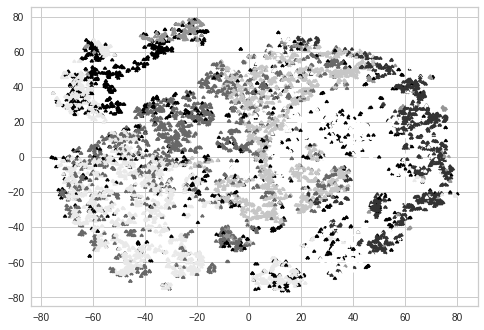

In [18]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X.copy())

plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker=10,
            s=10,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=clusters   # Colour as per gmm
            )

# <a id="8">Anomaly Detection</a>
Anomaly points can be considered as points which do occur in outliers or rather say in areas of low density. We can identify them by setting some density threshold.
Here we are taking density threshold as 4%.

In [19]:
density = model.score_samples(X)
density_threshold = np.percentile(density,4)
cc1['cluster']=clusters
cc1['Anamoly'] = density<density_threshold
cc1

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster,Anamoly
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5,False
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,False
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,False
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,6,True
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3,False
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3,False
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3,False
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1,False


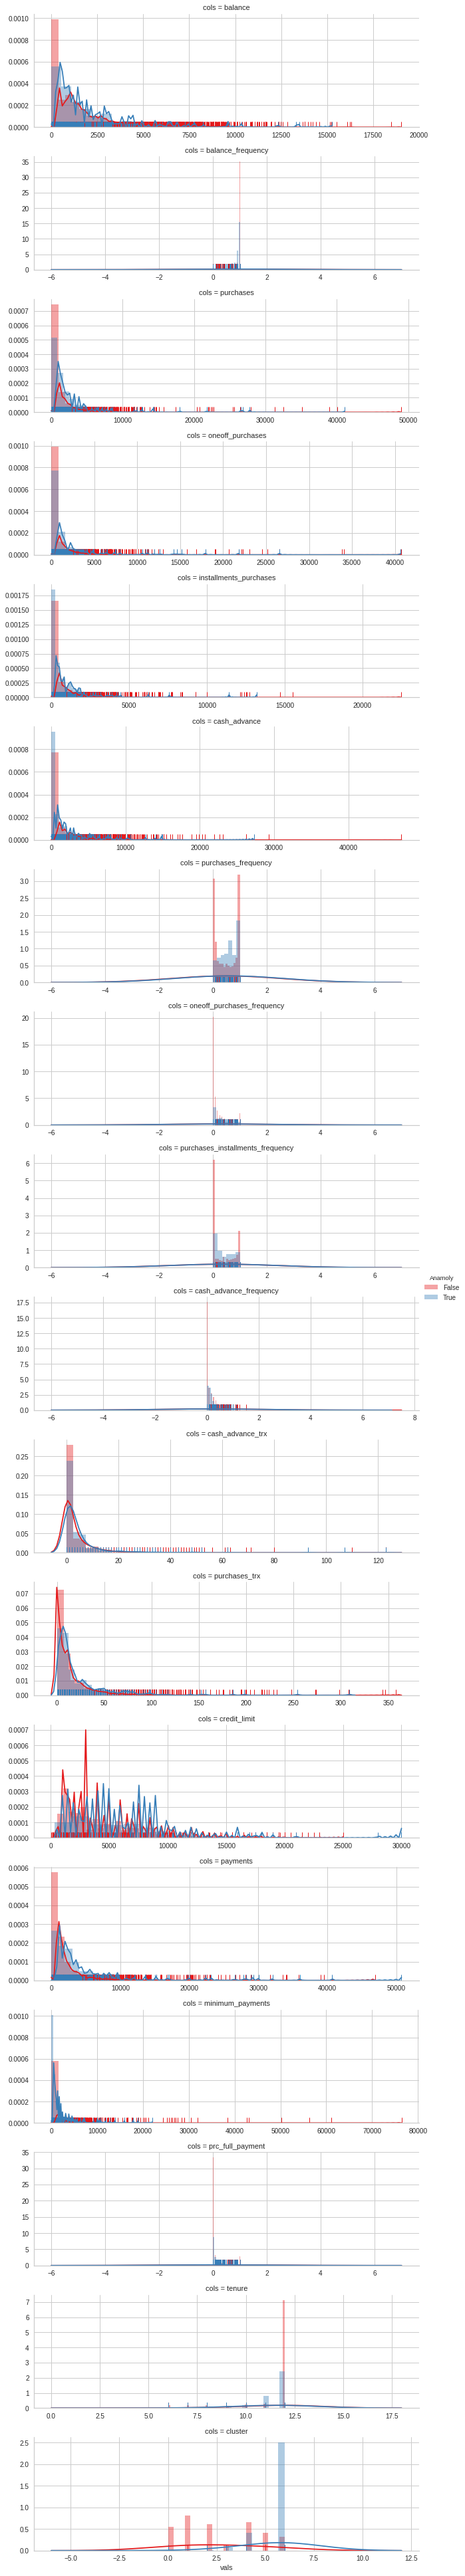

In [20]:
df = cc1.melt(['Anamoly'], var_name='cols',  value_name='vals')

g = sns.FacetGrid(df, row='cols', hue="Anamoly", palette="Set1",sharey=False,sharex=False,aspect=3)
g = (g.map(sns.distplot, "vals", hist=True, rug=True,kde_kws = {'bw':2}).add_legend())

<Figure size 1080x720 with 0 Axes>

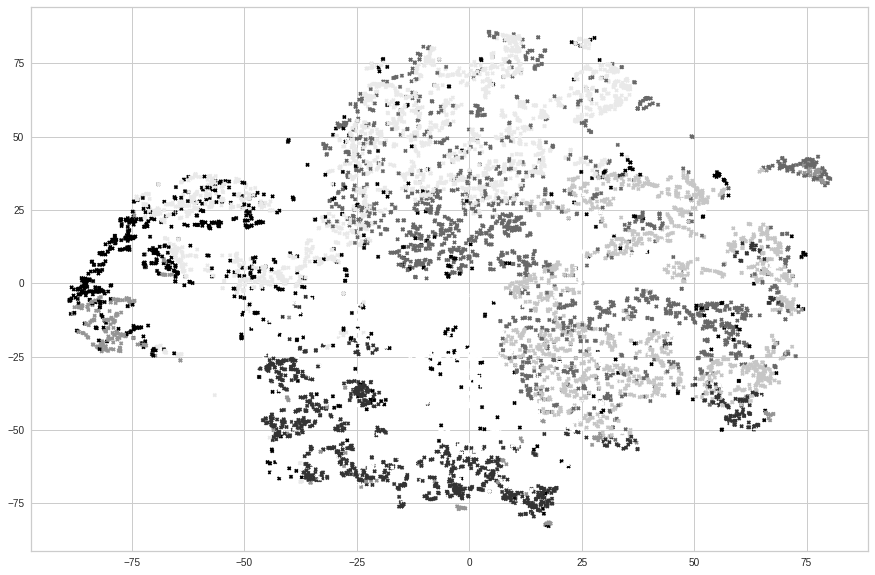

In [21]:
unanomaly = X[density>=density_threshold]
c = clusters[density>=density_threshold]
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(unanomaly)
plt.figure(figsize=(15,10))
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],marker='x',s=10, linewidths=5, c=c)